In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fastai.text import *

In [0]:
from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
path = '/content/drive/My Drive/analisis_alcalde_2019/'

In [0]:
df = pd.read_csv(path+"tweets 21.csv")
df.head()

,ID,creado_en,nombreusuario,nombre,creacion_usuario,seguidores,siguiendo,numero_tweets,geolocalziacion_habilitada,idioma,...,BermudezBronson,balerioestacio,inca_jose,EduardoArgudoG,fcojimenez21,patobuendia23,jaimelomas74,Simon_BolivarEC,edgarsalazar_51,jaimenebotsaadi
0,1105923462068088832,Wed Mar 13 20:07:55 +0000 2019,Christianoleas2,Christianoleas,Sat Dec 15 04:46:05 +0000 2018,0,74,122,False,es,...,False,False,False,False,False,False,False,False,False,True
1,1105923594482319363,Wed Mar 13 20:08:26 +0000 2019,miguel3vargas,miguel vargas cornej,Sun Nov 13 21:03:03 +0000 2016,0,58,333,False,es,...,False,False,False,False,False,False,False,False,False,True
2,1105924416641396739,Wed Mar 13 20:11:42 +0000 2019,ofelitavera,Ab. Ofelia Vera,Tue Apr 17 14:56:08 +0000 2012,441,358,9072,False,es,...,False,False,False,False,False,False,False,False,False,False
3,1105924428838387712,Wed Mar 13 20:11:45 +0000 2019,GORRASGYE,JOSHUA F,Sat Jan 26 20:04:59 +0000 2013,4092,4373,22586,True,es,...,False,False,False,False,False,False,False,False,False,False
4,1105924978741071872,Wed Mar 13 20:13:56 +0000 2019,PatricioPlazaD9,Patricio Plaza Daza,Tue Dec 05 02:05:23 +0000 2017,45,395,1869,False,es,...,False,False,False,False,False,False,False,False,False,False


In [0]:
print(df.columns)
print(df.shape)
print(df.ID.count())

Index(['ID', 'creado_en', 'nombreusuario', 'nombre', 'creacion_usuario',
       'seguidores', 'siguiendo', 'numero_tweets',
       'geolocalziacion_habilitada', 'idioma', 'origen', 'idioma_del_tweet',
       'tweet', 'hashtags', 'es_respuesta', 'jimmyjairala', 'cedeno_marth',
       'jorgevillacrese', 'CynthiaViteri6', 'GinoCornejoM', 'BermudezBronson',
       'balerioestacio', 'inca_jose', 'EduardoArgudoG', 'fcojimenez21',
       'patobuendia23', 'jaimelomas74', 'Simon_BolivarEC', 'edgarsalazar_51',
       'jaimenebotsaadi'],
      dtype='object')
(11230, 30)
11230


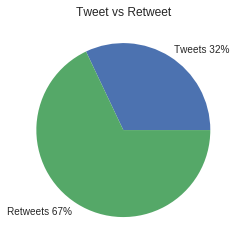

In [0]:
tweets_vs_retweet = [int(df[~df['tweet'].astype(str).str.startswith('RT')].ID.count()), int(df.ID.count())]
plt.pie(tweets_vs_retweet, labels=("Tweets " + str(int(tweets_vs_retweet[0]/(tweets_vs_retweet[0]+tweets_vs_retweet[1])*100)) +"%" ,"Retweets "+ str(int(tweets_vs_retweet[1]/(tweets_vs_retweet[0]+tweets_vs_retweet[1])*100)) +"%"))
plt.title('Tweet vs Retweet')
plt.show()

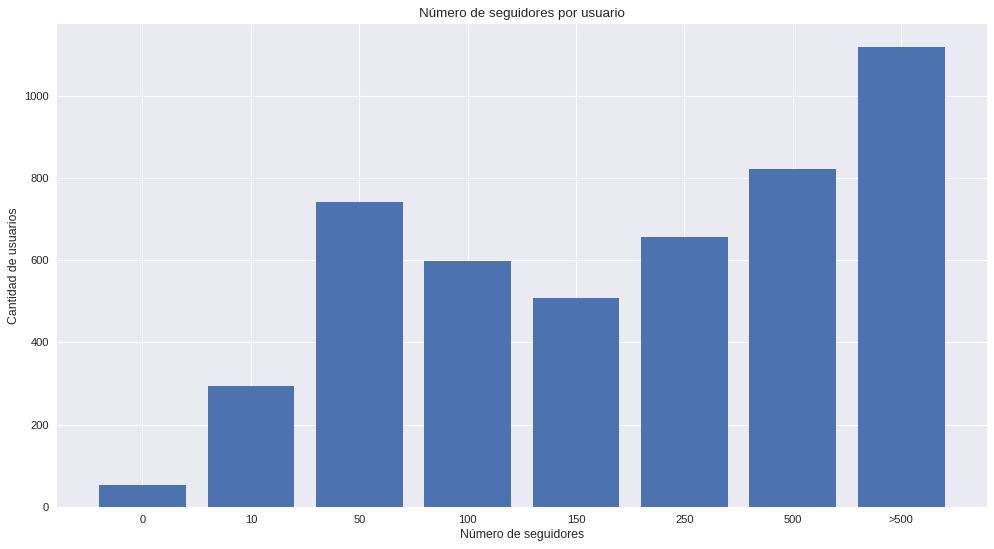

In [0]:
number_of_followers = [sum(df["seguidores"].groupby(df["nombreusuario"]).max()==0),
                      sum((df["seguidores"].groupby(df["nombreusuario"]).max()<11) & (df["seguidores"].groupby(df["nombreusuario"]).max()>0)),
                      sum((df["seguidores"].groupby(df["nombreusuario"]).max()<51) & (df["seguidores"].groupby(df["nombreusuario"]).max()>10)),
                      sum((df["seguidores"].groupby(df["nombreusuario"]).max()<101) & (df["seguidores"].groupby(df["nombreusuario"]).max()>50)),
                      sum((df["seguidores"].groupby(df["nombreusuario"]).max()<151) & (df["seguidores"].groupby(df["nombreusuario"]).max()>100)),
                      sum((df["seguidores"].groupby(df["nombreusuario"]).max()<251) & (df["seguidores"].groupby(df["nombreusuario"]).max()>150)),
                      sum((df["seguidores"].groupby(df["nombreusuario"]).max()<501) & (df["seguidores"].groupby(df["nombreusuario"]).max()>250)),
                      sum((df["seguidores"].groupby(df["nombreusuario"]).max()>500))]
plt.figure(figsize=(15, 8), dpi= 80, facecolor='w', edgecolor='k')
number = ["0","10","50","100","150","250","500",">500"]
plt.ylabel("Cantidad de usuarios")
plt.xlabel("Número de seguidores")
plt.bar(number, height=number_of_followers)
plt.title('Número de seguidores por usuario')
plt.show()

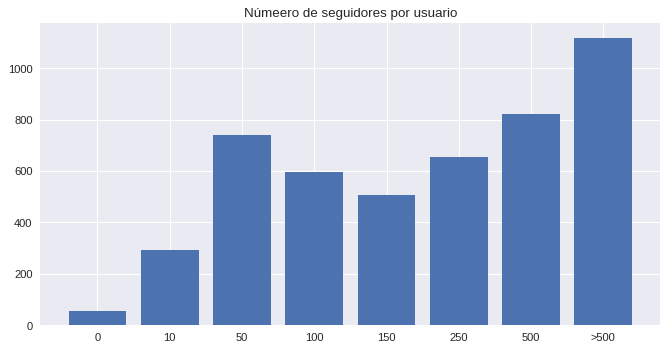

In [0]:
number_of_followers = [sum(df["seguidores"].groupby(df["nombreusuario"]).max()==0),
                      sum((df["seguidores"].groupby(df["nombreusuario"]).max()<11) & (df["seguidores"].groupby(df["nombreusuario"]).max()>0)),
                      sum((df["seguidores"].groupby(df["nombreusuario"]).max()<51) & (df["seguidores"].groupby(df["nombreusuario"]).max()>10)),
                      sum((df["seguidores"].groupby(df["nombreusuario"]).max()<101) & (df["seguidores"].groupby(df["nombreusuario"]).max()>50)),
                      sum((df["seguidores"].groupby(df["nombreusuario"]).max()<151) & (df["seguidores"].groupby(df["nombreusuario"]).max()>100)),
                      sum((df["seguidores"].groupby(df["nombreusuario"]).max()<251) & (df["seguidores"].groupby(df["nombreusuario"]).max()>150)),
                      sum((df["seguidores"].groupby(df["nombreusuario"]).max()<501) & (df["seguidores"].groupby(df["nombreusuario"]).max()>250)),
                      sum((df["seguidores"].groupby(df["nombreusuario"]).max()>500))]
plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
number = ["0","10","50","100","150","250","500",">500"]
plt.bar(number, height=number_of_followers)
plt.title('Númeero de seguidores por usuario')
plt.show()

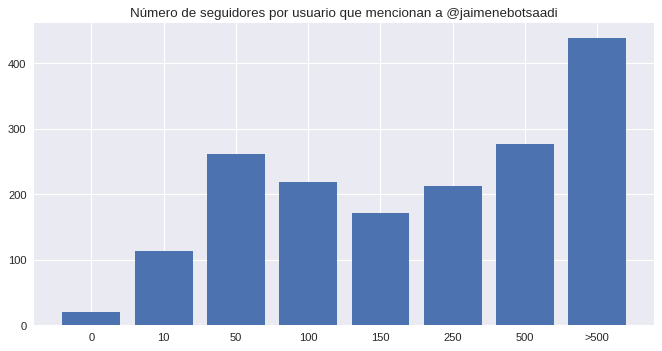

In [0]:
df_ns = df.loc[df['jaimenebotsaadi'] == True]
number_of_followers = [sum(df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()==0),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()<11) & (df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>0)),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()<51) & (df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>10)),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()<101) & (df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>50)),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()<151) & (df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>100)),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()<251) & (df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>150)),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()<501) & (df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>250)),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>500))]
plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
number = ["0","10","50","100","150","250","500",">500"]
plt.bar(number, height=number_of_followers)
plt.title('Número de seguidores por usuario que mencionan a @jaimenebotsaadi')
plt.show()

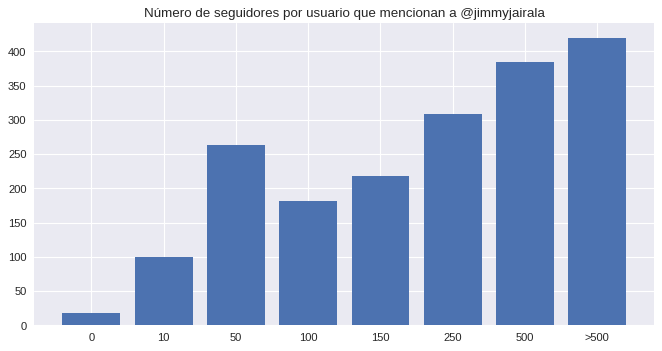

In [0]:
df_ns = df.loc[df['jimmyjairala'] == True]
number_of_followers = [sum(df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()==0),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()<11) & (df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>0)),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()<51) & (df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>10)),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()<101) & (df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>50)),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()<151) & (df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>100)),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()<251) & (df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>150)),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()<501) & (df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>250)),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>500))]
plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
number = ["0","10","50","100","150","250","500",">500"]
plt.bar(number, height=number_of_followers)
plt.title('Número de seguidores por usuario que mencionan a @jimmyjairala')
plt.show()

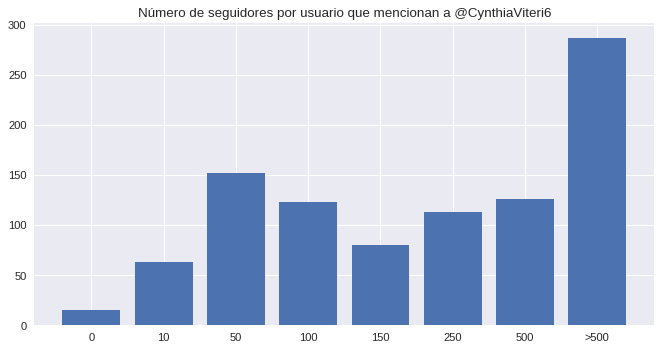

In [0]:
df_ns = df.loc[df['CynthiaViteri6'] == True]
number_of_followers = [sum(df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()==0),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()<11) & (df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>0)),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()<51) & (df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>10)),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()<101) & (df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>50)),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()<151) & (df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>100)),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()<251) & (df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>150)),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()<501) & (df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>250)),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>500))]
plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
number = ["0","10","50","100","150","250","500",">500"]
plt.bar(number, height=number_of_followers)
plt.title('Número de seguidores por usuario que mencionan a @CynthiaViteri6')
plt.show()

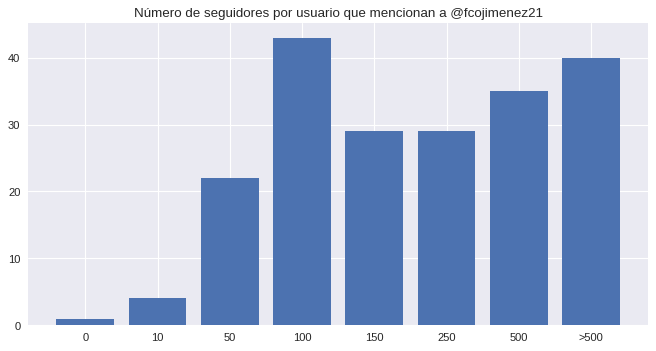

In [0]:
df_ns = df.loc[df['fcojimenez21'] == True]
number_of_followers = [sum(df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()==0),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()<11) & (df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>0)),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()<51) & (df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>10)),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()<101) & (df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>50)),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()<151) & (df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>100)),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()<251) & (df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>150)),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()<501) & (df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>250)),
                      sum((df_ns["seguidores"].groupby(df_ns["nombreusuario"]).max()>500))]
plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
number = ["0","10","50","100","150","250","500",">500"]
plt.bar(number, height=number_of_followers)
plt.title('Número de seguidores por usuario que mencionan a @fcojimenez21')
plt.show()

In [0]:
# Only tweets no retweets
df = df[~df['tweet'].astype(str).str.startswith('RT')]

In [0]:
# tweet with only one mention 
df[df[['jimmyjairala', 'cedeno_marth',
       'jorgevillacrese', 'CynthiaViteri6', 'GinoCornejoM', 'BermudezBronson',
       'balerioestacio', 'inca_jose', 'EduardoArgudoG', 'fcojimenez21',
       'patobuendia23', 'jaimelomas74', 'Simon_BolivarEC', 'edgarsalazar_51',
       'jaimenebotsaadi']].sum(axis=1)==1].to_csv(path+"noRTOneMetion.csv", encoding='utf-8')


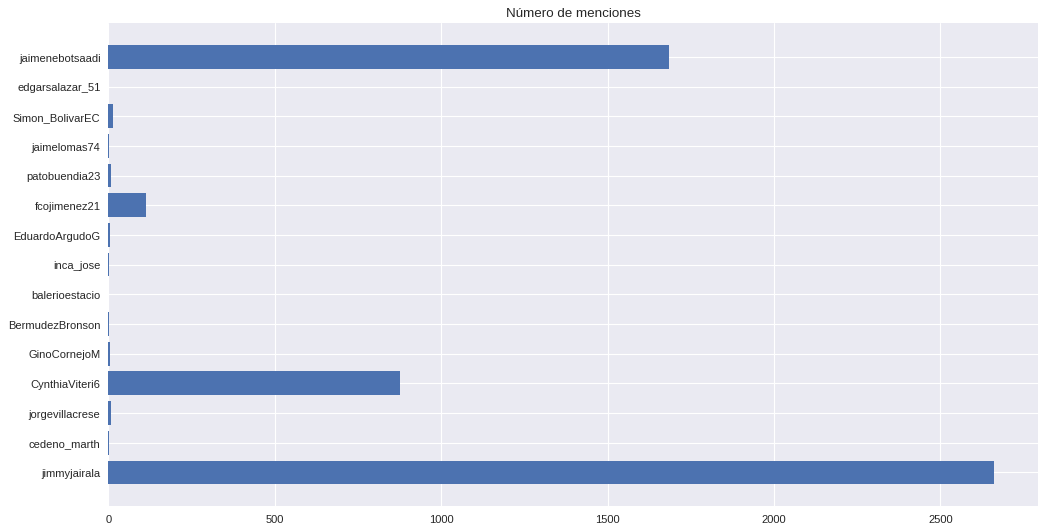

In [0]:
plt.figure(figsize=(15, 8), dpi= 80, facecolor='w', edgecolor='k')
n_mention = [df.jimmyjairala.sum(), df.cedeno_marth.sum(), df.jorgevillacrese.sum(),
             df.CynthiaViteri6.sum(), df.GinoCornejoM.sum(), df.BermudezBronson.sum(),
             df.balerioestacio.sum(), df.inca_jose.sum(), df.EduardoArgudoG.sum(),
             df.fcojimenez21.sum(), df.patobuendia23.sum(), df.jaimelomas74.sum(),
             df.Simon_BolivarEC.sum(), df.edgarsalazar_51.sum(), df.jaimenebotsaadi.sum()]
username  = ('jimmyjairala', 'cedeno_marth',
       'jorgevillacrese', 'CynthiaViteri6', 'GinoCornejoM', 'BermudezBronson',
       'balerioestacio', 'inca_jose', 'EduardoArgudoG', 'fcojimenez21',
       'patobuendia23', 'jaimelomas74', 'Simon_BolivarEC', 'edgarsalazar_51',
        'jaimenebotsaadi')
plt.barh(username, width=n_mention, left=0)
plt.title('Número de menciones')
plt.show()

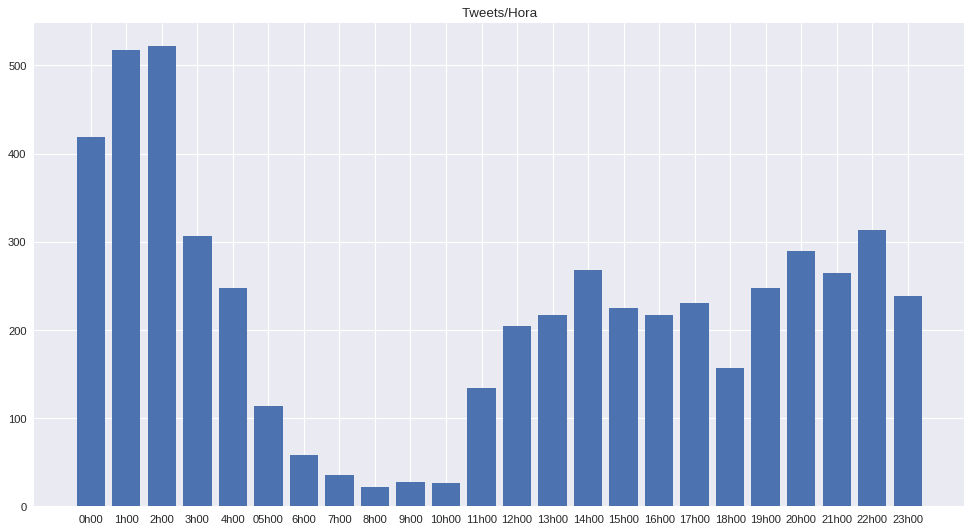

In [0]:
plt.figure(figsize=(15, 8), dpi= 80, facecolor='w', edgecolor='k')
time = ["0h00","1h00","2h00","3h00","4h00","05h00","6h00","7h00","8h00",
       "9h00","10h00","11h00","12h00","13h00","14h00","15h00","16h00",
       "17h00","18h00","19h00","20h00","21h00","22h00","23h00"]
plt.bar(time, height=df.groupby([pd.to_datetime(df.creado_en).dt.hour]).size())
plt.title('Tweets/Hora')
plt.show()

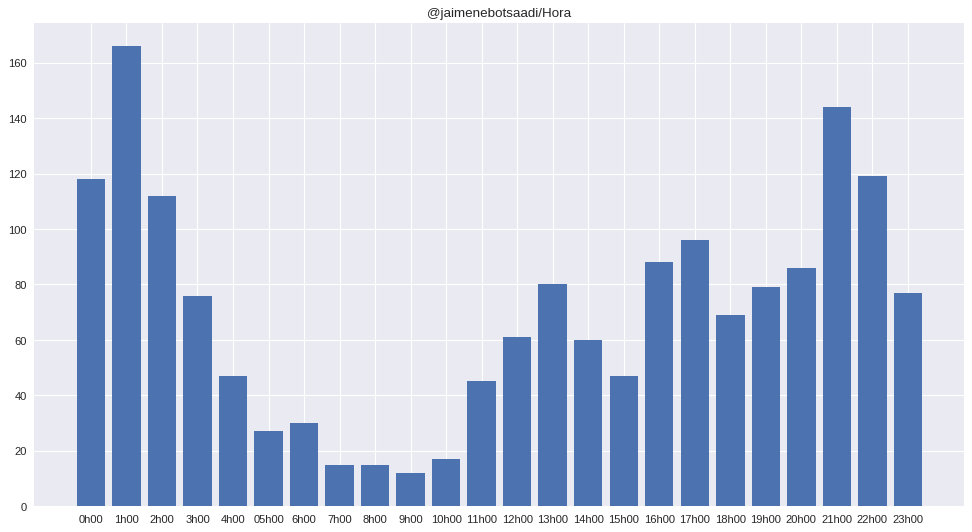

In [0]:
plt.figure(figsize=(15, 8), dpi= 80, facecolor='w', edgecolor='k')
time = ["0h00","1h00","2h00","3h00","4h00","05h00","6h00","7h00","8h00",
       "9h00","10h00","11h00","12h00","13h00","14h00","15h00","16h00",
       "17h00","18h00","19h00","20h00","21h00","22h00","23h00"]
plt.bar(time, height=df.groupby([pd.to_datetime(df.loc[df['jaimenebotsaadi'] == True].creado_en).dt.hour]).size())
plt.title('@jaimenebotsaadi/Hora')
plt.show()


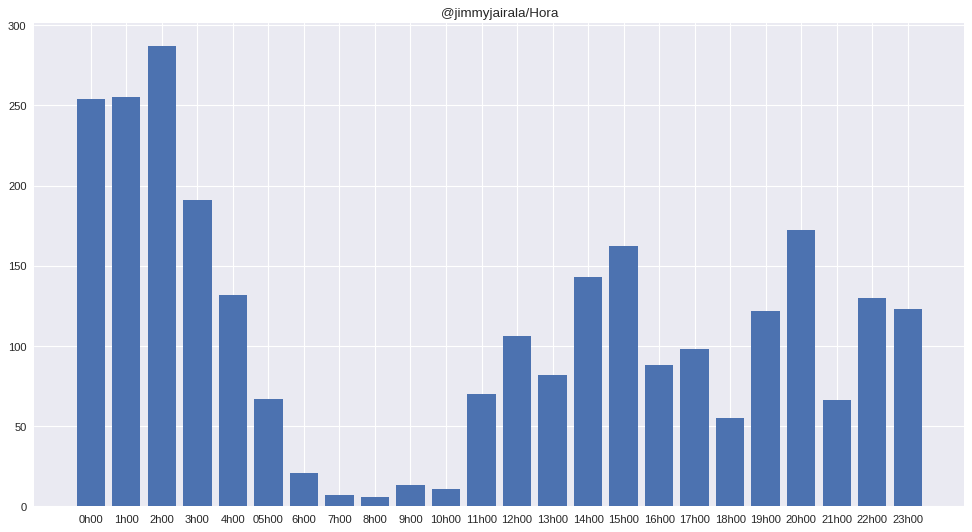

In [0]:
plt.figure(figsize=(15, 8), dpi= 80, facecolor='w', edgecolor='k')
time = ["0h00","1h00","2h00","3h00","4h00","05h00","6h00","7h00","8h00",
       "9h00","10h00","11h00","12h00","13h00","14h00","15h00","16h00",
       "17h00","18h00","19h00","20h00","21h00","22h00","23h00"]
plt.bar(time, height=df.groupby([pd.to_datetime(df.loc[df['jimmyjairala'] == True].creado_en).dt.hour]).size())
plt.title('@jimmyjairala/Hora')
plt.show()


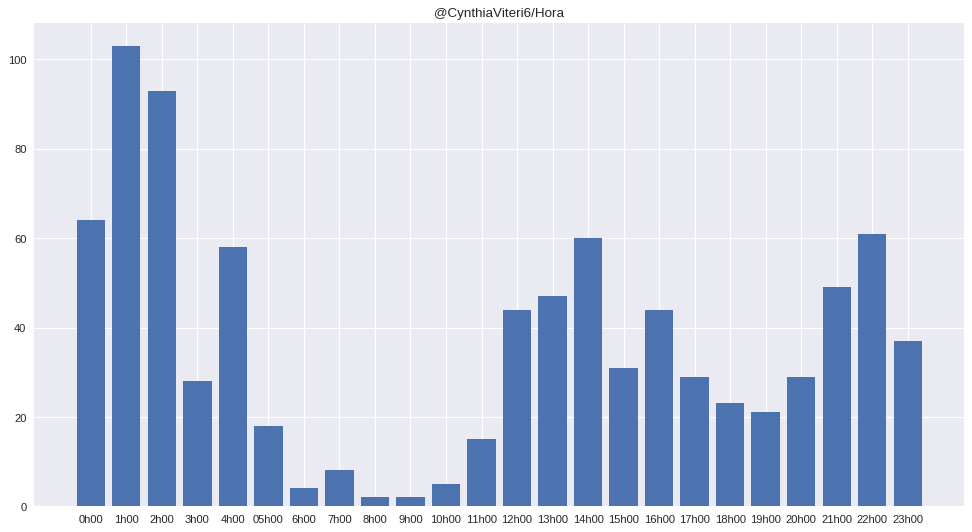

In [0]:
plt.figure(figsize=(15, 8), dpi= 80, facecolor='w', edgecolor='k')
time = ["0h00","1h00","2h00","3h00","4h00","05h00","6h00","7h00","8h00",
       "9h00","10h00","11h00","12h00","13h00","14h00","15h00","16h00",
       "17h00","18h00","19h00","20h00","21h00","22h00","23h00"]
plt.bar(time, height=df.groupby([pd.to_datetime(df.loc[df['CynthiaViteri6'] == True].creado_en).dt.hour]).size())
plt.title('@CynthiaViteri6/Hora')
plt.show()


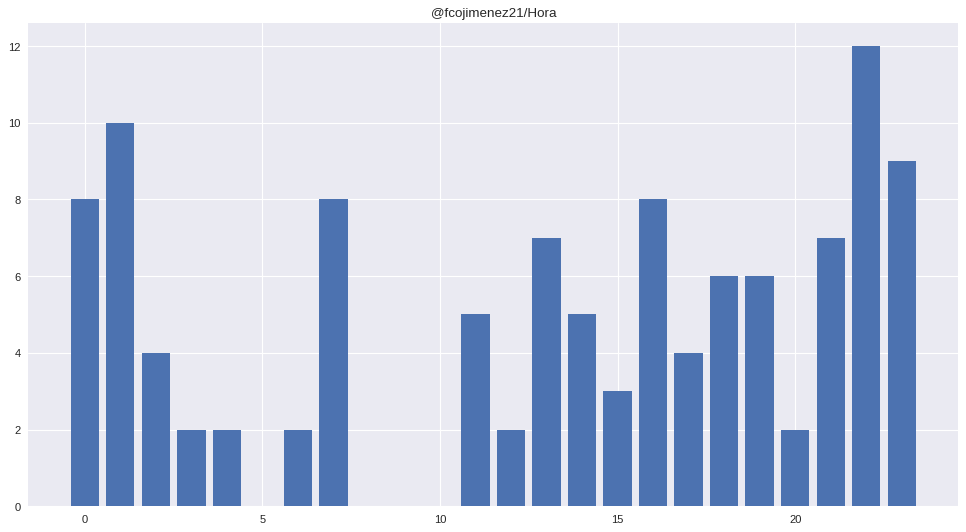

In [0]:
plt.figure(figsize=(15, 8), dpi= 80, facecolor='w', edgecolor='k')
time = ["0h00","1h00","2h00","3h00","4h00","05h00","6h00","7h00","8h00",
       "9h00","10h00","11h00","12h00","13h00","14h00","15h00","16h00",
       "17h00","18h00","19h00","20h00","21h00","22h00","23h00"]
plt.bar(df.groupby([pd.to_datetime(df.loc[df['fcojimenez21'] == True].creado_en).dt.hour]).groups.keys(), height=df.groupby([pd.to_datetime(df.loc[df['fcojimenez21'] == True].creado_en).dt.hour]).size())
plt.title('@fcojimenez21/Hora')
plt.show()


In [0]:
### Preddiction model

In [0]:
# remove username
df = pd.read_csv(path+"classification.csv")
df["tweet"] = df["tweet"].str.replace(r"(@)[A-Za-z0-9_]+", "")
df["tweet"] = df["tweet"].dropna()
df = df[df["tweet"]!=""]
df = df[df["PON"]!=""]
df = df[df["PON"]!="O"]

df = df[~df["PON"].isna()]


In [0]:
df.to_csv(path+"ForModel.csv", encoding ='utf-8')
df = pd.read_csv(path+"ForModel.csv")


In [0]:
from fastai.text import *

In [0]:
data_lm = (TextList.from_csv(path, path+"tweets.csv", cols='tweet').split_by_rand_pct(0.1).label_for_lm().databunch())

In [0]:
data_lm.save('data_lm.pkl')

In [0]:
data_lm = load_data(path, 'data_lm.pkl')

In [0]:
data_lm.show_batch()

idx,text
0,"xxmaj bien por xxmaj la xxmaj perla del xxmaj pacifico . \r \n y esto xxup no es gracias a # xxmaj matraca @ja … xxbos xxup rt @cendemocratico : .@jimmyjairala inicia en estos momentos su caminata por xxmaj mucho xxmaj lote , al norte de la ciudad . xxmaj lo acompañan @diegospotorno , … xxbos xxup rt @ecuagallos : ¿ xxmaj sabían xxmaj uds . q xxup joba"
1,xxmaj hasta que devuelvan el dinero o se realice el concierto ! xxmaj pésima logística en época invernal ! # luismiguel / buena @joseluis_rr 👏 🏼 \r \n \r \n # xxunk \r \n # xxunk 🤷 🏼‍ ♂ ️ 🤷 🏼‍ ♂ ️ 🤷 🏼‍ ♂ ️ 🤷 🏼‍ ♂ ️ 🤷 🏼‍ ♂ ️ \r \n # xxunk https : / / t.co / xxunk
2,"la alcaldía de # xxmaj guayaquil : @jimmyjairala , @fcojimenez21 , … xxbos @mariaotras @elconsiglieri1 @justiceveraec @gpuuiogyedur @aqua2650 @ronpeper @manaranjodiaz @jorgevelezvelez @patrici02306665 @atrixiii @avonbuchwalds @taniaguaranda @fmaritza @albacedeozaval1 @patidblacio @cuenteromuisne @enriquemenoscal @gabriellaperu @dama @cynthiaviteri6 @lulagaray @paolajaramilloz @yatenemospresi @narcymaya2 xxmaj se va se va se va a xxunk en el xxunk de olmedo xxbos xxup rt @cendemocratico : xxmaj chongón y xxmaj puerto xxmaj hondo ya cumplen con las condiciones para"
3,"candidato a la alcaldía de # xxmaj guay … xxbos xxup rt @cendemocratico : [ # xxup boletín ] @jimmyjairala visitó xxmaj mucho xxmaj lote . xxmaj sus vecinos xxunk que los valores en sus planillas se han xxunk . xxmaj en … xxbos xxunk @jimmyjairala 🤦 ‍ ♂ ️ xxbos xxup rt @cendemocratico : xxmaj vía @canalrtu : @jimmyjairala llegó hasta xxmaj puná , parroquia rural de xxmaj"
4,"estimados seguidores . xxmaj los invitamos a seguir hoy la entrevista de @jimmyjairala en @radiohuancavilk desde … xxbos xxup rt @damadeallullas : @jennifercoloma xxunk xxunk xxunk xxunk @franksamaniegom xxunk xxunk … xxbos xxup rt @ecuadortv : xxup hoy | xxup 22h00 \r \n xxmaj en # decisiónendemocracia conoceremos a los candidatos a la alcaldía de # xxmaj guayaquil : @jimmyjairala , @fcojimenez21 , … xxbos xxup rt @damadeallullas :"


In [0]:
weights_pretrained = path+'converted_model'
itos_pretrained = path+'itos'
pretained_data = (weights_pretrained, itos_pretrained)
learn = language_model_learner(data_lm, AWD_LSTM, pretrained_fnames=pretained_data, drop_mult=0.6)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


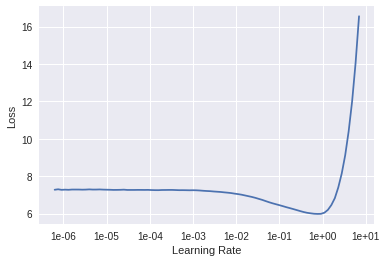

In [0]:
learn.recorder.plot(skip_end=1)

In [0]:
learn.fit_one_cycle(1, 1e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.099202,3.970043,0.314598,00:14


In [0]:
learn.save('fit_head')

In [0]:
learn.load('fit_head');

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(10, 1e-03, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.937126,3.578753,0.354821,00:18
1,3.579814,3.021521,0.446741,00:18
2,3.168866,2.618203,0.509643,00:18
3,2.799575,2.372685,0.555268,00:18
4,2.515592,2.227562,0.578438,00:18
5,2.303267,2.134162,0.594196,00:18
6,2.143560,2.081303,0.602679,00:18
7,2.019376,2.051470,0.607232,00:18
8,1.956064,2.042516,0.609821,00:18
9,1.929175,2.042511,0.609688,00:18


In [0]:
learn.save('fine_tuned')

In [0]:
learn.load('fine_tuned');

In [0]:
learn.save_encoder('fine_tuned_enc')

In [0]:
TEXT = "La ciudad de Guayaquil"
N_WORDS = 20
N_SENTENCES = 2

In [0]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

La ciudad de Guayaquil también se viste de naranja y sueña con # elmejorguayaquildetodoslostiempos con @jimmyjairala y el equipo de @la6mdg xxbos RT
La ciudad de Guayaquil se salvó del Socialismo de SXXI . Fue el bastión que nunca se pudieron tomar .


In [0]:
data_clas = (TextList.from_csv(path, path+"ForModel.csv", cols='tweet', vocab=data_lm.vocab).split_by_rand_pct().label_from_df(cols='PON')
             .databunch())

In [0]:
data_clas.save('data_clas.pkl')

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.2)
learn.load_encoder('fine_tuned_enc')

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


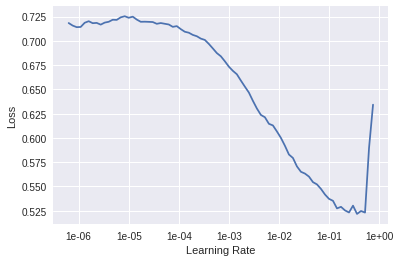

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, 1e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.581488,0.656811,0.688742,00:01


In [0]:
learn.save('first')

In [0]:
learn.load('first');

In [0]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-02/(2.6**4),1e-02), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.482573,0.521403,0.807947,00:01


In [0]:
learn.save('second')

In [0]:
learn.load('second');

In [0]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(1e-03/(2.6**4),1e-03), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.376679,0.479074,0.847682,00:02


In [0]:
learn.save('third')

In [0]:
learn.load('third');

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-03/(2.6**4),1e-03), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.355888,0.449902,0.834437,00:03
1,0.337926,0.415722,0.854305,00:03


In [0]:
learn.save('lastModel')

In [0]:
learn.save_encoder('lastModel_enc')

## Algunos ejemplos

In [0]:
learn.predict("Vamos a ganar mi alcalde")

(Category P, tensor(1), tensor([0.0649, 0.9351]))

In [0]:
learn.predict("Los mismos ladrones de siempre")

(Category N, tensor(0), tensor([0.7378, 0.2622]))

In [0]:
learn.predict("🐭🐭")

(Category N, tensor(0), tensor([0.6929, 0.3071]))

In [0]:
learn.predict("Es hora de un cambio")

(Category P, tensor(1), tensor([0.4567, 0.5433]))

In [0]:
learn.predict("Sinico, ladrón")

(Category N, tensor(0), tensor([0.7175, 0.2825]))

In [0]:
learn.predict("Tenemos el optimismo y convicción que el pueblo respaldará masivamente la propuesta de ")

(Category P, tensor(1), tensor([0.0348, 0.9652]))

In [0]:
learn.predict("no invierten nada . Porque si no les resulta el fraude y ganar las alcaldías que deseen en especial")[0]

Category N

In [0]:
dff = pd.read_csv(path+"tweets 21.csv")

In [0]:
def prediction(x):
  return learn.predict(x)[0]

In [0]:
dff["prediction"] = dff["tweet"].apply(prediction)

In [0]:
dff.to_csv(path+"Final.csv", encoding ='utf-8')


In [0]:
dff = dff[~dff['tweet'].astype(str).str.startswith('RT')]

In [0]:
print(dff.shape)
print(dff.columns)


(5298, 31)
Index(['ID', 'creado_en', 'nombreusuario', 'nombre', 'creacion_usuario',
       'seguidores', 'siguiendo', 'numero_tweets',
       'geolocalziacion_habilitada', 'idioma', 'origen', 'idioma_del_tweet',
       'tweet', 'hashtags', 'es_respuesta', 'jimmyjairala', 'cedeno_marth',
       'jorgevillacrese', 'CynthiaViteri6', 'GinoCornejoM', 'BermudezBronson',
       'balerioestacio', 'inca_jose', 'EduardoArgudoG', 'fcojimenez21',
       'patobuendia23', 'jaimelomas74', 'Simon_BolivarEC', 'edgarsalazar_51',
       'jaimenebotsaadi', 'prediction'],
      dtype='object')


In [0]:
jaimenebotsaadi_sent = dff.loc[dff["jaimenebotsaadi"]==True].groupby("prediction").size()
jimmyjairala_sent = dff.loc[dff["jimmyjairala"]==True].groupby("prediction").size()
CynthiaViteri6_sent = dff.loc[dff["CynthiaViteri6"]==True].groupby("prediction").size()
list_pos = [jaimenebotsaadi_sent[1], jimmyjairala_sent[1], CynthiaViteri6_sent[1]]
list_neg = [jaimenebotsaadi_sent[0], jimmyjairala_sent[0], CynthiaViteri6_sent[0]]

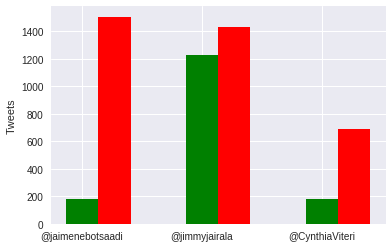

In [0]:
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.27 
ax = plt.subplot()
ax.set_ylabel('Tweets')
ax.set_xticks(ind+width)
ax.set_xticklabels(("@jaimenebotsaadi", "@jimmyjairala", "@CynthiaViteri") )
ax.bar(ind+width, list_pos,width=width,color='g',align='center')
ax.bar(ind+width*2, list_neg,width=width,color='r',align='center')
plt.show()
